<a href="https://colab.research.google.com/github/annsyj94/Data_Analytics_Portfolio/blob/main/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C(%EC%84%9C%EC%98%81%EC%A7%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train.csv : 학습 데이터**

id : 샘플 아이디

Store : 쇼핑몰 지점

Date : 주 단위(Weekly) 날짜

Temperature : 해당 쇼핑몰 주변 기온

Fuel_Price : 해당 쇼핑몰 주변 연료 가격

Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보

Unemployment : 해당 쇼핑몰 지역의 실업률

IsHoliday : 해당 기간의 공휴일 포함 여부

Weekly_Sales : 주간 매출액 (목표 예측값)

# **데이터 불러오기**

- Train.csv 
- Test.csv
- Sample_Submission.csv


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

train = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/shopping/train.csv"
test = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/shopping/test.csv"
sample_submission = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/shopping/sample_submission.csv"

df1 = pd.read_csv(train)
df2 = pd.read_csv(test)
df3 = pd.read_csv(sample_submission)

In [ ]:
df1.head(4)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59


In [ ]:
df2.head(4)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False


In [ ]:
df3.head(4)

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0


In [ ]:
print("Train Information")
print(df1.info())
print("-----------------------------------")
print("Test Information")
print(df2.info())
print("------------------------------------")

Train Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB
None
-----------------------------------
Test Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 colu

In [ ]:
#Datetime 자료형 변환
df1['Date'] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            6255 non-null   int64         
 1   Store         6255 non-null   int64         
 2   Date          6255 non-null   datetime64[ns]
 3   Temperature   6255 non-null   float64       
 4   Fuel_Price    6255 non-null   float64       
 5   Promotion1    2102 non-null   float64       
 6   Promotion2    1592 non-null   float64       
 7   Promotion3    1885 non-null   float64       
 8   Promotion4    1819 non-null   float64       
 9   Promotion5    2115 non-null   float64       
 10  Unemployment  6255 non-null   float64       
 11  IsHoliday     6255 non-null   bool          
 12  Weekly_Sales  6255 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2)
memory usage: 592.6 KB


In [ ]:
df1.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [ ]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)
df1.head(4)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,2,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59


In [ ]:
df1.isnull().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

## **EDA (Exploratory Data Analysis) 탐새적 데이터 분석 **

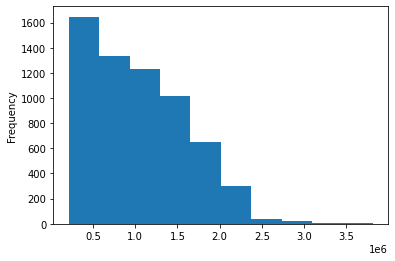

In [ ]:
df1['Weekly_Sales'].plot.hist()

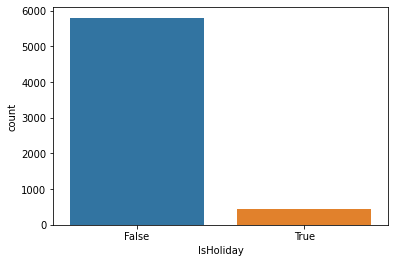

In [ ]:
sns.countplot(x="IsHoliday",data = df1)

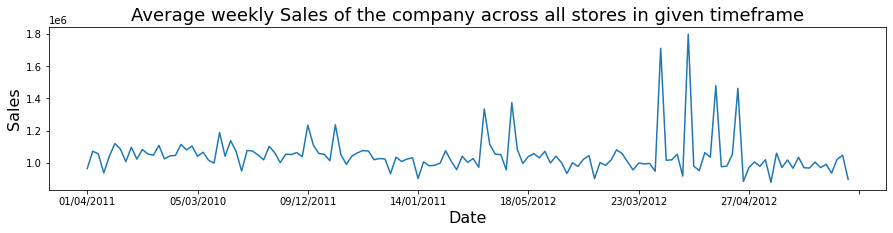

In [ ]:
plt.figure(figsize=(15,3))
df1.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

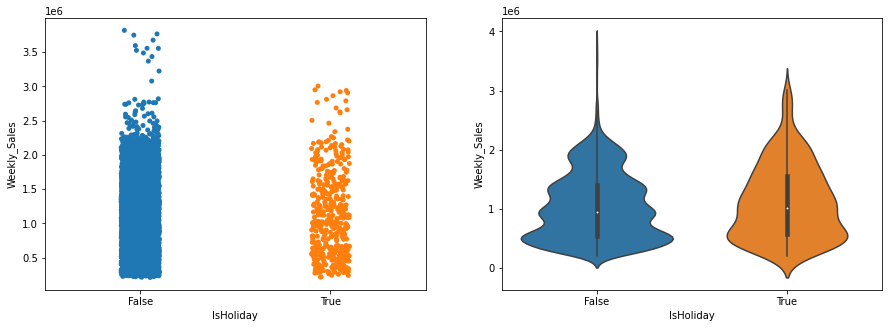

In [ ]:
fig,axes = plt.subplots(1,2, figsize = (15,5))
sns.stripplot (y=df1["Weekly_Sales"],x=df1['IsHoliday'],ax = axes[0])
sns.violinplot(y=df1['Weekly_Sales'],x=df1['IsHoliday'],ax = axes[1])
plt.show()

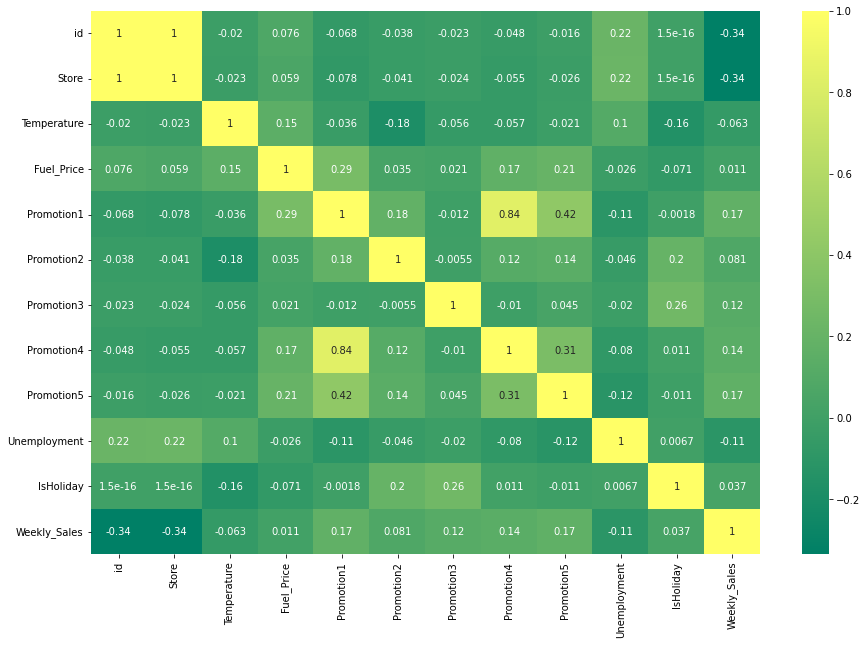

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap='summer');

# 선형회귀를 위해 DNN 사용하기 

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df1['IsHoliday'] = le.fit_transform(df1['IsHoliday'])
df1.head(5)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,1643690.90
1,2,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,1641957.44
2,3,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,1611968.17
3,4,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,0,1409727.59
4,5,1,2010-05-03,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,0,1554806.68


In [ ]:
df1['IsHoliday'] = df1["IsHoliday"].astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    6255 non-null   float64
 6   Promotion2    6255 non-null   float64
 7   Promotion3    6255 non-null   float64
 8   Promotion4    6255 non-null   float64
 9   Promotion5    6255 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   int64  
 12  Weekly_Sales  6255 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 635.4+ KB


In [ ]:
x = df1.drop(['Date','Weekly_Sales'], axis =1)
y = df1['Weekly_Sales']

In [ ]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})
x = x.values
y = y.to_numpy()
print(x[0,:])
print()
print(y[0:5])

[1.00 1.00 42.31 2.57 0.00 0.00 0.00 0.00 0.00 8.11 0.00]

[1643690.90 1641957.44 1611968.17 1409727.59 1554806.68]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

X_train:  (5004, 11)
y_train:  (5004,)
X_test:  (1251, 11)
y_test:  (1251,)


# 선형 휘귀를 위해 데이터 스케일링이 필요함 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_scaled[:1])
print("----------------")
print(x_test_scaled[:1])


[[-1.51 -1.55 0.91 0.71 0.01 -0.17 -0.08 -0.04 -0.20 -0.92 -0.28]]
----------------
[[0.61 0.61 1.81 0.75 -0.40 -0.17 -0.08 -0.26 -0.36 -0.09 -0.28]]


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras import optimizers 
import tensorflow as tf

model = Sequential()
model.add(Dense(64, input_dim = x_scaled.shape[1], activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,473
Trainable params: 17,473
Non-trai

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer = optimizer , loss = 'mse', metrics = ['mean_absolute_error'])
model.fit(x_scaled,y_train, epochs = 800 )

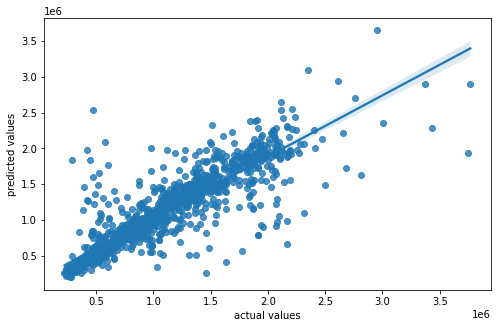

In [ ]:
pred = model.predict(x_test_scaled)

plt.figure(figsize = (8,5))
sns.regplot(x=y_test, y = pred)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

# **Test.csv : 테스트 데이터**

id : 샘플 아이디

Store : 쇼핑몰 지점

Date : 주 단위(Weekly) 날짜

Temperature : 해당 쇼핑몰 주변 기온

Fuel_Price : 해당 쇼핑몰 주변 연료 가격

Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보

Unemployment : 해당 쇼핑몰 지역의 실업률

IsHoliday : 해당 기간의 공휴일 포함 여부


In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df2['IsHoliday'] = le.fit_transform(df2['IsHoliday'])
df2.head(5)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,0
1,2,1,12/10/2012,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,0
2,3,1,19/10/2012,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,0
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,0
4,5,2,05/10/2012,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,0


In [ ]:
df2 = df2.drop(['Date'], axis =1)
df2.head(5)

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,0
1,2,1,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,0
2,3,1,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,0
3,4,1,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,0
4,5,2,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,0


In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)

model.fit(x_scaler,y, epochs = 785 )

Epoch 1/785
196/196 [==============================] - 1s 3ms/step - loss: 27428980736.0000 - mean_absolute_error: 90093.0625
Epoch 2/785
196/196 [==============================] - 1s 4ms/step - loss: 24168968192.0000 - mean_absolute_error: 87381.0469
Epoch 3/785
196/196 [==============================] - 1s 3ms/step - loss: 23674937344.0000 - mean_absolute_error: 87008.5234
Epoch 4/785
196/196 [==============================] - 1s 3ms/step - loss: 22315988992.0000 - mean_absolute_error: 85158.4688
Epoch 5/785
196/196 [==============================] - 1s 3ms/step - loss: 22636589056.0000 - mean_absolute_error: 86558.6562
Epoch 6/785
196/196 [==============================] - 1s 3ms/step - loss: 21852973056.0000 - mean_absolute_error: 86186.7578
Epoch 7/785
196/196 [==============================] - 1s 3ms/step - loss: 21362391040.0000 - mean_absolute_error: 85916.6562
Epoch 8/785
196/196 [==============================] - 1s 3ms/step - loss: 21558757376.0000 - mean_absolute_error: 858

In [ ]:
prediction = model.predict(df2)
prediction

array([[1086691840.00],
       [654304192.00],
       [314976544.00],
       [386237472.00],
       [903447040.00],
       [973324352.00],
       [729813696.00],
       [1058985920.00],
       [225275824.00],
       [83856640.00],
       [259953968.00],
       [60087432.00],
       [1124293760.00],
       [1063406144.00],
       [1194400896.00],
       [759859200.00],
       [358501120.00],
       [417211872.00],
       [187046368.00],
       [233128304.00],
       [1582195072.00],
       [805986368.00],
       [517557376.00],
       [960452160.00],
       [328490112.00],
       [90636728.00],
       [642472128.00],
       [411328672.00],
       [600179136.00],
       [407112832.00],
       [400879040.00],
       [457219808.00],
       [409439008.00],
       [235884704.00],
       [253007808.00],
       [168598544.00],
       [1417318656.00],
       [930091584.00],
       [584860608.00],
       [869220224.00],
       [1095157504.00],
       [1162531840.00],
       [521173248.00],
     

In [ ]:
sub = pd.DataFrame({
    "id": df3["id"],
    "Weekly_Sales" : prediction.flatten()
})

sub

,id,Weekly_Sales
0,1,1.086692e+09
1,2,6.543042e+08
2,3,3.149765e+08
3,4,3.862375e+08
4,5,9.034470e+08
...,...,...
175,176,6.304008e+07
176,177,6.926572e+08
177,178,5.741163e+08
178,179,3.705980e+08


In [ ]:
sub.to_csv("submission3.csv", index = False)
print("Save")

Save
